<a href="https://colab.research.google.com/github/dipanjanS/building-effective-agentic-ai-systems-dhs2025/blob/main/Demo_2_Build_a_Customer_Support_Router_Agentic_RAG_System_DHS2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build a Customer Support Router Agentic RAG System

In this project, we will leverage the power of AI Agents and RAG Systems to build an intelligent Router Agentic RAG System to handle customer support queries using a custom knowledgebase.

![](https://i.imgur.com/Em0lzai.png)

### Intelligent Router Agentic RAG System

This project focuses on building an **Intelligent Router Agentic RAG System** that combines intelligent query analysis, sentiment detection, and dynamic routing with Retrieval-Augmented Generation (RAG) to handle diverse user inquiries efficiently. The workflow includes the following components:

1. **Query Categorization and Sentiment Analysis**:
   - The system uses **OpenAI GPT-4o** to analyze the user's query and determine:
     - **Query Category**: Identifies the type of problem, such as billing, technical issues, or general queries.
     - **User Sentiment**: Evaluates the user's sentiment (positive, neutral, or negative) to determine if escalation is needed.

2. **Intelligent Routing**:
   - Based on the **query_category** and **query_sentiment**, the system routes the query to the appropriate handling node:
     - **Escalate to Human**: If the sentiment is negative, the query is escalated to a human for resolution.
     - **Generate Billing Response**: Queries related to billing are routed to generate an appropriate response.
     - **Generate Technical Response**: Technical queries are routed for a specialized technical response.
     - **Generate General Response**: General queries are handled with context-aware responses.

3. **Knowledge Base Integration (RAG)**:
   - The system integrates with a **Knowledge Base (Vector Database)** to augment responses with relevant and accurate information.
   - Retrieval-Augmented Generation (RAG) ensures that responses are grounded in the latest and most reliable data.

4. **Escalation Mechanism**:
   - Negative sentiment triggers an **escalation to a human**, ensuring the user receives empathetic and personalized support for critical issues.


## Install OpenAI, LangGraph and LangChain dependencies

In [ ]:
!pip install langchain==0.3.27 langchain-community==0.3.27 langchain-openai==0.3.30 langgraph==0.6.5 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.5/152.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 15.1 MB/s eta 0:00:00


In [ ]:
!pip install langchain-chroma --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.6 MB/s eta

In [ ]:
!pip install ipywidgets jupyter-ui-poll --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.1 MB/s eta 0:00:00


## Enter Open AI API Key

In [ ]:
from getpass import getpass

OPENAI_KEY = getpass('Enter Open AI API Key: ')

Enter Open AI API Key: ··········


## Setup Environment Variables

In [ ]:
import os

os.environ['OPENAI_API_KEY'] = OPENAI_KEY

## Load Company Knowledge Base

In [ ]:
# or download manually from https://drive.google.com/file/d/1CWHutosAcJ6fiddQW5ogvg7NgLstZJ9j/view?usp=sharing and upload to colab or your notebook location
!gdown 1CWHutosAcJ6fiddQW5ogvg7NgLstZJ9j

Downloading...
From: https://drive.google.com/uc?id=1CWHutosAcJ6fiddQW5ogvg7NgLstZJ9j
To: /content/router_agent_documents.json
100% 7.99k/7.99k [00:00<00:00, 15.8MB/s]


In [ ]:
import json

with open("./router_agent_documents.json", "r") as f:
    knowledge_base = json.load(f)

In [ ]:
from langchain.docstore.document import Document
from tqdm import tqdm

processed_docs = []

for doc in tqdm(knowledge_base):
    metadata = doc['metadata']
    data = doc['text']
    processed_docs.append(Document(page_content=data,
                                   metadata=metadata))

processed_docs[:3]

100%|██████████| 30/30 [00:00<00:00, 36429.97it/s]


[Document(metadata={'category': 'technical'}, page_content='Question: How do I integrate your AI product with my existing CRM system? Answer: You can integrate our AI product with your CRM using our API. Refer to the API documentation available on our website for step-by-step guidance.'),
 Document(metadata={'category': 'technical'}, page_content='Question: What programming languages are supported by your SDK? Answer: Our SDK supports Python, Java, and JavaScript. Additional language support is planned for future updates.'),
 Document(metadata={'category': 'technical'}, page_content='Question: Can your AI models run on-premise? Answer: Yes, our AI models can be deployed on-premise. We provide deployment guides for various environments.')]

In [ ]:
processed_docs[0]

Document(metadata={'category': 'technical'}, page_content='Question: How do I integrate your AI product with my existing CRM system? Answer: You can integrate our AI product with your CRM using our API. Refer to the API documentation available on our website for step-by-step guidance.')

In [ ]:
categories = set([doc.metadata['category'] for doc in processed_docs])
categories

{'billing', 'general', 'technical'}

In [ ]:
billing_data = [doc for doc in processed_docs if doc.metadata['category'] == 'billing']
technical_data = [doc for doc in processed_docs if doc.metadata['category'] == 'technical']
general_data = [doc for doc in processed_docs if doc.metadata['category'] == 'general']

## Create Vector Databases

In [ ]:
from langchain_openai import OpenAIEmbeddings

# details here: https://openai.com/blog/new-embedding-models-and-api-updates
openai_embed_model = OpenAIEmbeddings(model='text-embedding-3-small')

In [ ]:
from langchain_chroma import Chroma

billing_db = Chroma.from_documents(documents=billing_data,
                                   collection_name='billing_database',
                                   embedding=openai_embed_model,
                                   # need to set the distance function to cosine else it uses euclidean by default
                                   # check https://docs.trychroma.com/guides#changing-the-distance-function
                                   collection_metadata={"hnsw:space": "cosine"},
                                   persist_directory="./knowledge_bases")

technical_db = Chroma.from_documents(documents=technical_data,
                                     collection_name='technical_database',
                                     embedding=openai_embed_model,
                                     collection_metadata={"hnsw:space": "cosine"},
                                     persist_directory="./knowledge_bases")

general_db = Chroma.from_documents(documents=general_data,
                                   collection_name='general_database',
                                   embedding=openai_embed_model,
                                   collection_metadata={"hnsw:space": "cosine"},
                                   persist_directory="./knowledge_bases")

In [ ]:
billing_retriever = billing_db.as_retriever(search_type="similarity_score_threshold",
                                            search_kwargs={"k": 3, "score_threshold": 0.2})

techical_retriever = technical_db.as_retriever(search_type="similarity_score_threshold",
                                               search_kwargs={"k": 3, "score_threshold": 0.2})

general_retriever = general_db.as_retriever(search_type="similarity_score_threshold",
                                            search_kwargs={"k": 3, "score_threshold": 0.2})

In [ ]:
query = 'what is your refund policy?'
billing_retriever.invoke(query)

[Document(id='a3d3b556-739a-4673-a5c5-d661ccb47054', metadata={'category': 'billing'}, page_content='Question: Do you provide refunds for unused subscription periods? Answer: Refunds are provided based on our refund policy. Please refer to our Terms and Conditions for more details.'),
 Document(id='be89a4e2-379a-4a2c-a3b0-2b1117259c50', metadata={'category': 'billing'}, page_content='Question: Do you charge taxes on the subscription? Answer: Applicable taxes are calculated based on your location and displayed during checkout.'),
 Document(id='b3078515-47c6-467b-824a-c9cd97c56863', metadata={'category': 'billing'}, page_content='Question: Do you offer any discounts for annual subscriptions? Answer: Yes, we offer a 10% discount on annual subscriptions compared to monthly billing. You can select this option during checkout.')]

## Plan the Agent Workflow Structure

This is the Agent workflow we will be using

![](https://i.imgur.com/tyXpJ4J.png)

Next up we will define the Agent State Schema and Python functions for each of the nodes in this Agent graph

## Define the Agent State Schema

We create a `CustomerSupportState` typed dictionary to keep track of each interaction:
- **customer_query**: The text of the customer's question
- **query_category**: Technical, Billing, or General (used for routing)
- **query_sentiment**: Positive, Neutral, or Negative (used for routing)
- **final_response**: The system's response to the customer
- **escalation_cust_info**: The customer details when input in the escalation form

In [ ]:
from typing import TypedDict, Literal
from pydantic import BaseModel

class CustomerSupportState(TypedDict):
    customer_query: str
    query_category: str
    query_sentiment: str
    final_response: str
    escalation_cust_info: dict

class QueryCategory(BaseModel):
    categorized_topic: Literal['Technical', 'Billing', 'General']

class QuerySentiment(BaseModel):
    sentiment: Literal['Positive', 'Neutral', 'Negative']

## Create Node Functions

Each function below represents a stage in processing a customer inquiry:

1. **categorize_inquiry**: Classifies the query into Technical, Billing, or General.
2. **analyze_inquiry_sentiment**: Determines if the sentiment is Positive, Neutral, or Negative.
3. **generate_technical_response**: Produces a response for technical issues.
4. **generate_billing_response**: Produces a response for billing questions.
5. **generate_general_response**: Produces a response for general queries.
6. **accept_user_input_escalation**: Collects additional input from the user when a negative sentiment is detected to facilitate escalation to a human support agent.
6. **escalate_to_human_agent**: Escalates the query and submitted form details to a human agent for personalized resolution.
7. **determine_route**: Routes the inquiry to the appropriate response node based on category and sentiment.

In [ ]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

### Create the categorize_inquiry node function

Helps in classifying the user query to either Technical, Billing, or General.

In [ ]:
def categorize_inquiry(support_state: CustomerSupportState) -> CustomerSupportState:
    """
    Classify the customer query into Technical, Billing, or General.
    """

    query = support_state["customer_query"]
    ROUTE_CATEGORY_PROMPT = """Act as a customer support agent trying to best categorize the customer query.
                               You are an agent for an AI products and hardware company.

                               Please read the customer query below and
                               determine the best category from the following list:

                               'Technical', 'Billing', or 'General'.

                               Remember:
                                - Technical queries will focus more on technical aspects like AI models, hardware, software related queries etc.
                                - General queries will focus more on general aspects like contacting support, finding things, policies etc.
                                - Billing queries will focus more on payment and purchase related aspects

                                Return just the category name (from one of the above)

                                Query:
                                {customer_query}
                            """
    prompt = ROUTE_CATEGORY_PROMPT.format(customer_query=query)
    route_category = llm.with_structured_output(QueryCategory).invoke(prompt)

    return {
        "query_category": route_category.categorized_topic
    }

In [ ]:
categorize_inquiry({"customer_query": "Do you provide pretrained models?"})

{'query_category': 'Technical'}

In [ ]:
categorize_inquiry({"customer_query": "what payment methods are accepted?"})

{'query_category': 'Billing'}

### Create the analyze_inquiry_sentiment node function

Helps in classifying the user query to either Positive, Neutral, or Negative based on the sentiment.

In [ ]:
def analyze_inquiry_sentiment(support_state: CustomerSupportState) -> CustomerSupportState:
    """
    Analyze the sentiment of the customer query as Positive, Neutral, or Negative.
    """

    query = support_state["customer_query"]
    SENTIMENT_CATEGORY_PROMPT = """Act as a customer support agent trying to best categorize the customer query's sentiment.
                                   You are an agent for an AI products and hardware company.

                                   Please read the customer query below,
                                   analyze its sentiment which should be one from the following list:

                                   'Positive', 'Neutral', or 'Negative'.

                                   Return just the sentiment (from one of the above)

                                   Query:
                                   {customer_query}
                                """
    prompt = SENTIMENT_CATEGORY_PROMPT.format(customer_query=query)
    sentiment_category = llm.with_structured_output(QuerySentiment).invoke(prompt)

    return {
        "query_sentiment": sentiment_category.sentiment
    }

In [ ]:
analyze_inquiry_sentiment({"customer_query": "what is your refund policy?"})

{'query_sentiment': 'Neutral'}

In [ ]:
analyze_inquiry_sentiment({"customer_query": "what is your refund policy? I am really fed up with this product and need to refund it"})

{'query_sentiment': 'Negative'}

### Create the generate_technical_response node function

Provide a technical support response to the user query by combining knowledge from the vector store and LLM using RAG

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from typing import Dict

def generate_technical_response(support_state: CustomerSupportState) -> CustomerSupportState:
    """
    Provide a technical support response by combining knowledge from the vector store and LLM.
    """
    query = support_state["customer_query"]

    # Perform retrieval from VectorDB
    relevant_docs = techical_retriever.invoke(query)
    retrieved_content = "\n\n".join(doc.page_content for doc in relevant_docs)

    # Combine retrieved information into the prompt
    prompt = ChatPromptTemplate.from_template(
        """
        Craft a clear and detailed technical support response for the following customer query.
        Use the provided knowledge base information to enrich your response.
        Provide just the response content - do not add any boilerplate template information.
        In case there is no knowledge base information or you do not know the answer just say:

        Apologies I was not able to answer your question, please reach out to +1-xxx-xxxx

        Customer Query:
        {customer_query}

        Relevant Knowledge Base Information:
        {retrieved_content}
        """
    )

    # Generate the final response using the LLM
    chain = prompt | llm
    tech_reply = chain.invoke({
        "customer_query": query,
        "retrieved_content": retrieved_content
    }).content

    # Update and return the modified support state
    return {
        "final_response": tech_reply
    }


In [ ]:
generate_technical_response({"customer_query": "do you support on-prem models?",
                             "query_category": "Technical"})

{'final_response': 'Yes, we do support on-premise models. Our AI models can be deployed in your own environment, and we provide detailed deployment guides tailored for various setups. If you need assistance with the deployment process or have specific requirements, feel free to reach out for further support. Additionally, we offer a range of pre-trained models suitable for different use cases, including natural language processing, computer vision, and recommendation systems. If you encounter any issues with model performance, I recommend reviewing the logs, checking resource utilization, and validating the quality of your input data.'}

In [ ]:
generate_technical_response({"customer_query": "what is your refund policy?", "query_category": "Technical"})

{'final_response': 'Apologies I was not able to answer your question, please reach out to +1-xxx-xxxx.'}

### Create the generate_billing_response node function

Provide a billing support response to the user query by combining knowledge from the vector store and LLM using RAG

In [ ]:
def generate_billing_response(support_state: CustomerSupportState) -> CustomerSupportState:
    """
    Provide a billing support response by combining knowledge from the vector store and LLM.
    """
    query = support_state["customer_query"]

    # Perform retrieval from VectorDB
    relevant_docs = billing_retriever.invoke(query)
    retrieved_content = "\n\n".join(doc.page_content for doc in relevant_docs)

    # Combine retrieved information into the prompt
    prompt = ChatPromptTemplate.from_template(
        """
        Craft a clear and detailed billing support response for the following customer query.
        Use the provided knowledge base information to enrich your response.
        Provide just the response content - do not add any boilerplate template information.
        In case there is no knowledge base information or you do not know the answer just say:

        Apologies I was not able to answer your question, please reach out to +1-xxx-xxxx

        Customer Query:
        {customer_query}

        Relevant Knowledge Base Information:
        {retrieved_content}
        """
    )

    # Generate the final response using the LLM
    chain = prompt | llm
    billing_reply = chain.invoke({
        "customer_query": query,
        "retrieved_content": retrieved_content
    }).content

    # Update and return the modified support state
    return {
        "final_response": billing_reply
    }

### Create the generate_general_response node function

Provide a general support response to the user query by combining knowledge from the vector store and LLM using RAG

In [ ]:
def generate_general_response(support_state: CustomerSupportState) -> CustomerSupportState:
    """
    Provide a general support response by combining knowledge from the vector store and LLM.
    """
    query = support_state["customer_query"]

    # Perform retrieval from VectorDB
    relevant_docs = general_retriever.invoke(query)
    retrieved_content = "\n\n".join(doc.page_content for doc in relevant_docs)

    # Combine retrieved information into the prompt
    prompt = ChatPromptTemplate.from_template(
        """
        Craft a clear and detailed general support response for the following customer query.
        Use the provided knowledge base information to enrich your response.
        Provide just the response content - do not add any boilerplate template information.
        In case there is no knowledge base information or you do not know the answer just say:

        Apologies I was not able to answer your question, please reach out to +1-xxx-xxxx

        Customer Query:
        {customer_query}

        Relevant Knowledge Base Information:
        {retrieved_content}
        """
    )

    # Generate the final response using the LLM
    chain = prompt | llm
    general_reply = chain.invoke({
        "customer_query": query,
        "retrieved_content": retrieved_content
    }).content

    # Update and return the modified support state
    return {
        "final_response": general_reply
    }


### Create the accept_user_input_escalation function

![](https://i.imgur.com/nwTR2ce.png)

Collects additional input from the user when a negative sentiment is detected to facilitate escalation to a human support agent.

This function opens up a simple form using Jupyter widgets as a User Interface (UI), accepts information from the user in the UI and saves it in the agent state to be used later. Example shown below here:

![](https://i.imgur.com/feZqjwj.png)

__Note:__ You are free to implement your own UI based workflows to accept user input when you build or integrate such a system in your existing applications \ organization

In [ ]:
import ipywidgets as widgets
from IPython.display import display
from jupyter_ui_poll import ui_events
import time

def accept_user_input_escalation(support_state: CustomerSupportState) -> CustomerSupportState:

    # REMEMBER: You can always customize the way you accept user input by modifying the code below
    # here we use jupyter widgets so you don't have to install too many external dependencies

    global form_submitted  # status variable to track form submission
    form_submitted = False # initially form hasn't been submitted

    # UI Header: A simple HTML element to label the form
    header = widgets.HTML("<h3>Escalation Form - Please enter your details below:</h3>")

    # Text input fields to collect user information
    input1 = widgets.Text(description='Name:')     # User's full name
    input2 = widgets.Text(description='Number:')   # Contact number
    input3 = widgets.Text(description='Email:')    # Email address

    # Dictionary to store form responses after submission
    result = {}

    # Callback function to be triggered when the Submit button is clicked
    def on_submit(submit_button):
        global form_submitted
        form_submitted = True  # Mark the form as submitted
        # Store user inputs into the result dictionary
        result['name'] = input1.value
        result['number'] = input2.value
        result['email'] = input3.value
        # Provide visual feedback that form is submitted
        submit_button.description = '👍'

    # Submit button widget setup
    submit_button = widgets.Button(description="Submit")
    submit_button.on_click(on_submit)  # Attach callback to button

    # Combine all widgets into a vertical layout box
    vbox = widgets.VBox([header, input1, input2, input3, submit_button])
    display(vbox)  # Render the form in the notebook interface

    # Keep polling UI events until the form is submitted
    with ui_events() as poll:
        while form_submitted is False:
            poll(5)               # Listen for UI events
            print('.', end='')   # Show a dot to indicate waiting for input from user
            time.sleep(0.3)      # Slight delay to reduce CPU usage

    # Return updated agent state with captured user info for escalation
    return {
        'escalation_cust_info': result
    }


In [ ]:
accept_user_input_escalation({})

....................................................................................................................................

{'escalation_cust_info': {'name': 'DJ',
  'number': '9101010',
  'email': 'dj@gmail.com'}}

### Create the escalate_to_human_agent function

Escalates the query and submitted form details to a human agent for personalized resolution.

The agent shows a response back to the user with their form input details that they will be contacted soon.

__Note:__ You are free to implement any custom logic here to:
 - Send emails to human agent
 - Call APIs to notify support agent like Whatsapp or internal company platforms

In [ ]:
def escalate_to_human_agent(support_state: CustomerSupportState) -> CustomerSupportState:

    # REMEMBER: You can always customize the way you notify the human support agent by adding custom code below.
    # This could include emailing them, paging them, sending them notifications using specific platform APIs like whatsapp etc.
    # Here we have kept it very simple:
    #  we just show a response back to the user showing the details they entered in the form earlier
    #  and telling them they will be contacted by a human support agent

    # get the customer info from agent state which they entered in the form
    escalation_cust_info = support_state['escalation_cust_info']
    # the following response will be shown to the user and can also be sent (customer form inputs) to your human support agents
    response = ("Apologies, " + escalation_cust_info['name'] +
                ",  we are really sorry! Someone from our team will be reaching out to via email shortly at "+
                escalation_cust_info['email'] + " and if needed we will also be calling you at: " +
                escalation_cust_info['number'] + " to help you out!")

    # NOTE: You can always add custom code here to call specific APIs like whatsapp or email etc to notify your human support agents

    return {
        "final_response": response
    }

## Build and Compile the Agent Workflow

We construct a LangGraph Agentic workflow with the nodes defined above:
1. **categorize_inquiry** → **analyze_inquiry_sentiment** → **route** to the proper response node.
2. If negative, escalate to a human agent by filling in the customer escalation form first.
3. Otherwise, produce an appropriate response (technical, billing, or general).

In [ ]:
from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import MemorySaver

# Create the graph with our typed state
customer_support_graph = StateGraph(CustomerSupportState)

# Add nodes for each function
customer_support_graph.add_node("categorize_inquiry", categorize_inquiry)
customer_support_graph.add_node("analyze_inquiry_sentiment", analyze_inquiry_sentiment)
customer_support_graph.add_node("generate_technical_response", generate_technical_response)
customer_support_graph.add_node("generate_billing_response", generate_billing_response)
customer_support_graph.add_node("generate_general_response", generate_general_response)
customer_support_graph.add_node("accept_user_input_escalation", accept_user_input_escalation)
customer_support_graph.add_node("escalate_to_human_agent", escalate_to_human_agent)

# Add edges to represent the processing flow
customer_support_graph.add_edge("categorize_inquiry", "analyze_inquiry_sentiment")

# routing function
def determine_route(support_state: CustomerSupportState) -> str:
    """
    Route the inquiry based on sentiment and category.
    """
    if support_state["query_sentiment"] == "Negative":
        return "human_escalate_route"
    elif support_state["query_category"] == "Technical":
        return "technical_rag_route"
    elif support_state["query_category"] == "Billing":
        return "billing_rag_route"
    else:
        return "general_rag_route"

customer_support_graph.add_conditional_edges(
    "analyze_inquiry_sentiment",
    determine_route,
    {
        "human_escalate_route": "accept_user_input_escalation",
        "technical_rag_route": "generate_technical_response",
        "billing_rag_route": "generate_billing_response",
        "general_rag_route": "generate_general_response"
    }
)

customer_support_graph.add_edge("accept_user_input_escalation", "escalate_to_human_agent")

# All terminal nodes lead to the END
customer_support_graph.add_edge("generate_technical_response", END)
customer_support_graph.add_edge("generate_billing_response", END)
customer_support_graph.add_edge("generate_general_response", END)
customer_support_graph.add_edge("escalate_to_human_agent", END)

# Set the entry point for the workflow
customer_support_graph.set_entry_point("categorize_inquiry")

# Compile the graph into a runnable agent
memory = MemorySaver()
form_submitted = False
compiled_support_agent = customer_support_graph.compile(checkpointer=memory)

## Visualize the Agent Workflow

Below is a generated diagram of the workflow using Mermaid syntax. It shows how each node connects in the graph.

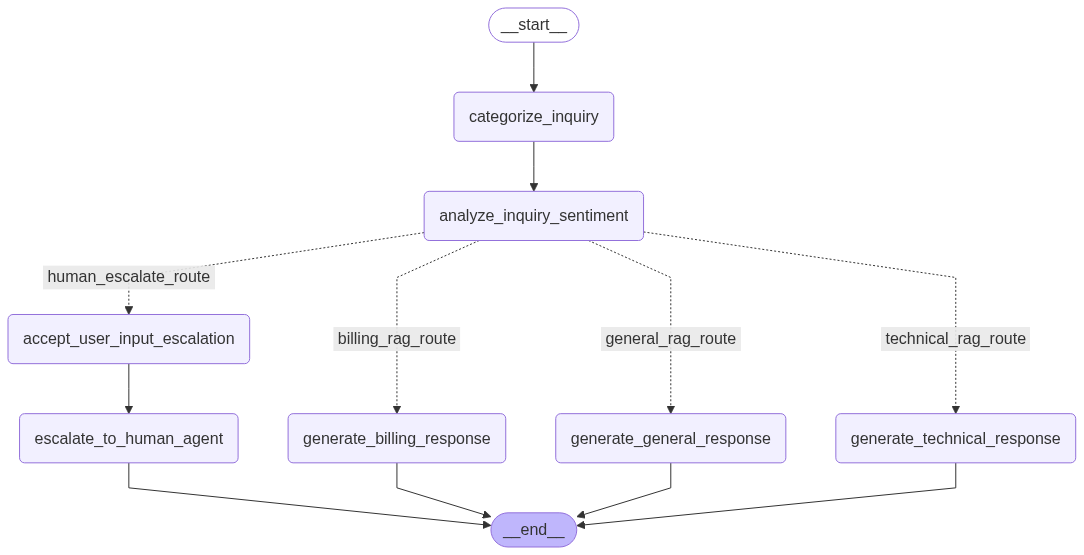

In [ ]:
from IPython.display import display, Image, Markdown

display(Image(compiled_support_agent.get_graph().draw_mermaid_png()))

## Helper Function to Run the Agent Workflow

This function takes a customer query and runs it through our compiled workflow, returning the final results (category, sentiment, and generated response).

In [ ]:
def call_support_agent(agent, prompt, user_session_id, verbose=False):
    events = agent.stream(
        {"customer_query": prompt}, # initial state of the agent
        {"configurable": {"thread_id": user_session_id}},
        stream_mode="values",
    )

    print('Running Agent. Please wait...')
    for event in events:
        if verbose:
                print(event)

    print('\nAgent Response:')
    display(Markdown(event['final_response'].replace('$', '\$')))

## Testing the Customer Support Agent Workflow

Let's test the workflow with some sample queries to verify categorization, sentiment analysis, and response generation.

In [ ]:
from IPython.display import display, Image, Markdown

In [ ]:
uid = 'jim001'
query = "do you support pre-trained models?"
call_support_agent(agent=compiled_support_agent,
                   prompt=query,
                   user_session_id=uid,
                   verbose=True)

Running Agent. Please wait...
{'customer_query': 'do you support pre-trained models?'}
{'customer_query': 'do you support pre-trained models?', 'query_category': 'Technical'}
{'customer_query': 'do you support pre-trained models?', 'query_category': 'Technical', 'query_sentiment': 'Neutral'}
{'customer_query': 'do you support pre-trained models?', 'query_category': 'Technical', 'query_sentiment': 'Neutral', 'final_response': "Yes, we do support pre-trained models. We offer a range of pre-trained models tailored for various use cases, including natural language processing (NLP), computer vision, and recommendation systems. Additionally, if you have specific requirements, you can fine-tune these models using your custom datasets to better suit your needs. If you're interested in deployment options, our AI models can also be deployed on-premise, and we provide comprehensive deployment guides for different environments. If you have any further questions or need assistance, feel free to ask

Yes, we do support pre-trained models. We offer a range of pre-trained models tailored for various use cases, including natural language processing (NLP), computer vision, and recommendation systems. Additionally, if you have specific requirements, you can fine-tune these models using your custom datasets to better suit your needs. If you're interested in deployment options, our AI models can also be deployed on-premise, and we provide comprehensive deployment guides for different environments. If you have any further questions or need assistance, feel free to ask!

In [ ]:
query = "how do I get my invoice?"
call_support_agent(agent=compiled_support_agent,
                   prompt=query,
                   user_session_id=uid,
                   verbose=True)

Running Agent. Please wait...
{'customer_query': 'how do I get my invoice?', 'query_category': 'Technical', 'query_sentiment': 'Neutral', 'final_response': "Yes, we do support pre-trained models. We offer a range of pre-trained models tailored for various use cases, including natural language processing (NLP), computer vision, and recommendation systems. Additionally, if you have specific requirements, you can fine-tune these models using your custom datasets to better suit your needs. If you're interested in deployment options, our AI models can also be deployed on-premise, and we provide comprehensive deployment guides for different environments. If you have any further questions or need assistance, feel free to ask!"}
{'customer_query': 'how do I get my invoice?', 'query_category': 'Billing', 'query_sentiment': 'Neutral', 'final_response': "Yes, we do support pre-trained models. We offer a range of pre-trained models tailored for various use cases, including natural language process

To get your invoice, you can download a detailed invoice from your account dashboard. Simply navigate to the 'Billing' section, and you will find the option to download your invoice there. If you have any further questions or need assistance, feel free to ask!

In [ ]:
query = "Can you tell me about your shipping policy?"
call_support_agent(agent=compiled_support_agent,
                   prompt=query,
                   user_session_id=uid,
                   verbose=False)

Running Agent. Please wait...

Agent Response:


Our shipping policy for hardware products is as follows: We offer free shipping for orders that total over \$500. For orders below this amount, a flat shipping fee of \$20 will apply. Typically, shipping takes between 5 to 7 business days. If you have any further questions or need assistance, feel free to reach out!

In [ ]:
query = "I'm fed up with this faulty hardware, I need a refund"
call_support_agent(agent=compiled_support_agent,
                   prompt=query,
                   user_session_id=uid,
                   verbose=True)

Running Agent. Please wait...
{'customer_query': "I'm fed up with this faulty hardware, I need a refund", 'query_category': 'General', 'query_sentiment': 'Neutral', 'final_response': 'Our shipping policy for hardware products is as follows: We offer free shipping for orders that total over $500. For orders below this amount, a flat shipping fee of $20 will apply. Typically, shipping takes between 5 to 7 business days. If you have any further questions or need assistance, feel free to reach out!'}
{'customer_query': "I'm fed up with this faulty hardware, I need a refund", 'query_category': 'Billing', 'query_sentiment': 'Neutral', 'final_response': 'Our shipping policy for hardware products is as follows: We offer free shipping for orders that total over $500. For orders below this amount, a flat shipping fee of $20 will apply. Typically, shipping takes between 5 to 7 business days. If you have any further questions or need assistance, feel free to reach out!'}
{'customer_query': "I'm fe

.......................................{'customer_query': "I'm fed up with this faulty hardware, I need a refund", 'query_category': 'Billing', 'query_sentiment': 'Negative', 'final_response': 'Our shipping policy for hardware products is as follows: We offer free shipping for orders that total over $500. For orders below this amount, a flat shipping fee of $20 will apply. Typically, shipping takes between 5 to 7 business days. If you have any further questions or need assistance, feel free to reach out!', 'escalation_cust_info': {'name': 'DJ', 'number': '90201010', 'email': 'dj@gmail.com'}}
{'customer_query': "I'm fed up with this faulty hardware, I need a refund", 'query_category': 'Billing', 'query_sentiment': 'Negative', 'final_response': 'Apologies, DJ,  we are really sorry! Someone from our team will be reaching out to via email shortly at dj@gmail.com and if needed we will also be calling you at: 90201010 to help you out!', 'escalation_cust_info': {'name': 'DJ', 'number': '90201

Apologies, DJ,  we are really sorry! Someone from our team will be reaching out to via email shortly at dj@gmail.com and if needed we will also be calling you at: 90201010 to help you out!

In [ ]:
query = "What are your working hours?"
call_support_agent(agent=compiled_support_agent,
                   prompt=query,
                   user_session_id=uid,
                   verbose=True)

Running Agent. Please wait...
{'customer_query': 'What are your working hours?', 'query_category': 'Billing', 'query_sentiment': 'Negative', 'final_response': 'Apologies, DJ,  we are really sorry! Someone from our team will be reaching out to via email shortly at dj@gmail.com and if needed we will also be calling you at: 90201010 to help you out!', 'escalation_cust_info': {'name': 'DJ', 'number': '90201010', 'email': 'dj@gmail.com'}}
{'customer_query': 'What are your working hours?', 'query_category': 'General', 'query_sentiment': 'Negative', 'final_response': 'Apologies, DJ,  we are really sorry! Someone from our team will be reaching out to via email shortly at dj@gmail.com and if needed we will also be calling you at: 90201010 to help you out!', 'escalation_cust_info': {'name': 'DJ', 'number': '90201010', 'email': 'dj@gmail.com'}}
{'customer_query': 'What are your working hours?', 'query_category': 'General', 'query_sentiment': 'Neutral', 'final_response': 'Apologies, DJ,  we are re

Our support team is available from 9:00 AM to 6:00 PM, Monday to Friday. If you need assistance outside of these hours, please feel free to reach out during our working hours.